<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### 1. Review of data 
 
Explore the data loaded from the boston project via inspection of the data within the Pandas dataframe object

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### 2. Boxplot 

For the 'Median value of owner-occupied homes' provide a *boxplot*

Text(0.5, 0, 'Median value of owner-occupied homes ($1000s)')

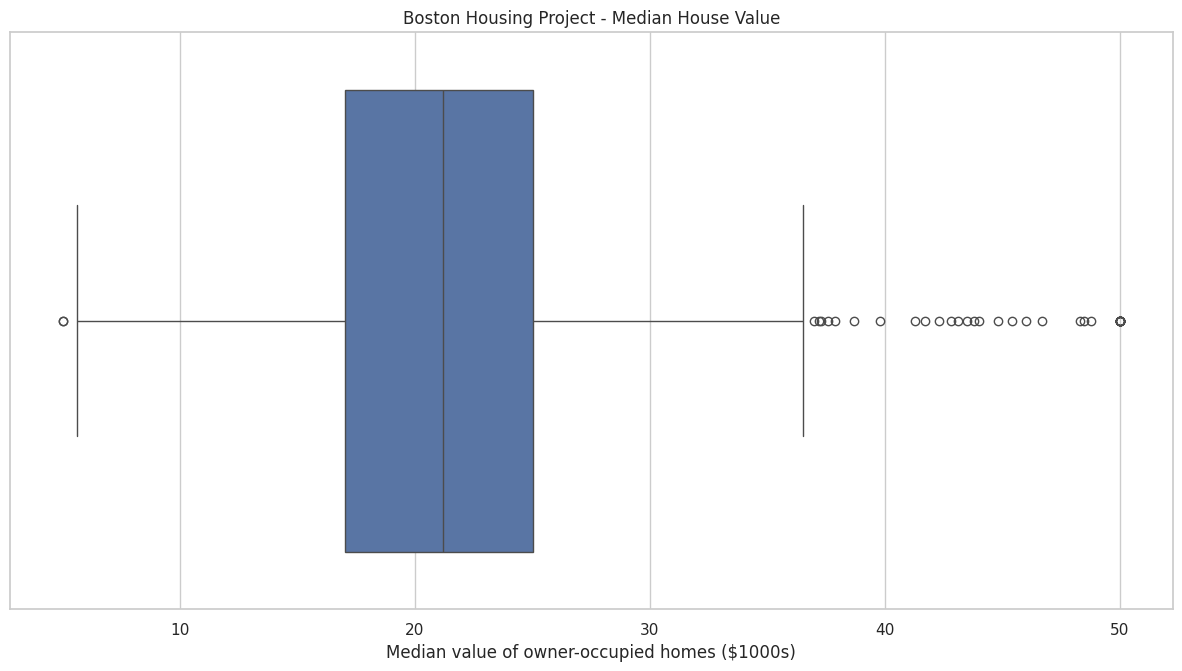

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 7.5))

sns.boxplot(data=boston_df, x='MEDV')
plt.title('Boston Housing Project - Median House Value')
plt.xlabel('Median value of owner-occupied homes ($1000s)')

### 3. Bar plot of Charler River variable
Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Bar plot for the Charles River variable')

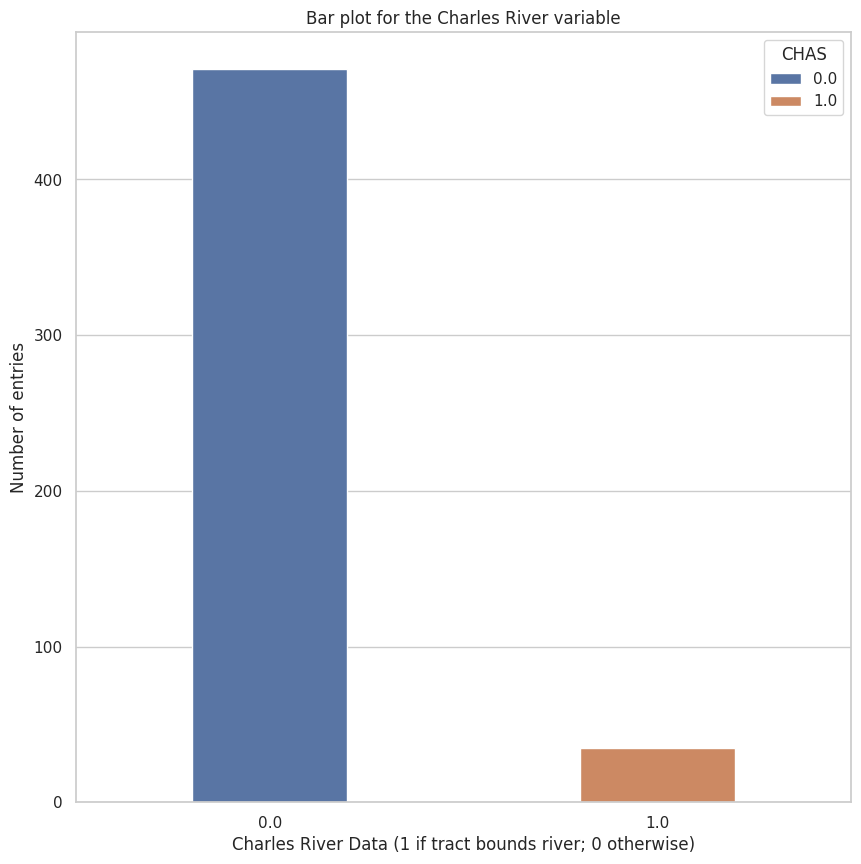

In [80]:
# create a bar plot of the chas river data
plt.figure(figsize=(10,10))

ax = sns.countplot(x='CHAS', data=boston_df, hue='CHAS', width=0.4)
plt.xlabel('Charles River Data (1 if tract bounds river; 0 otherwise)')
plt.ylabel("Number of entries")
plt.title("Bar plot for the Charles River variable")

### 4. Boxplot of MEDV

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 0, 'Median value of owner-occupied homes ($1000s)')

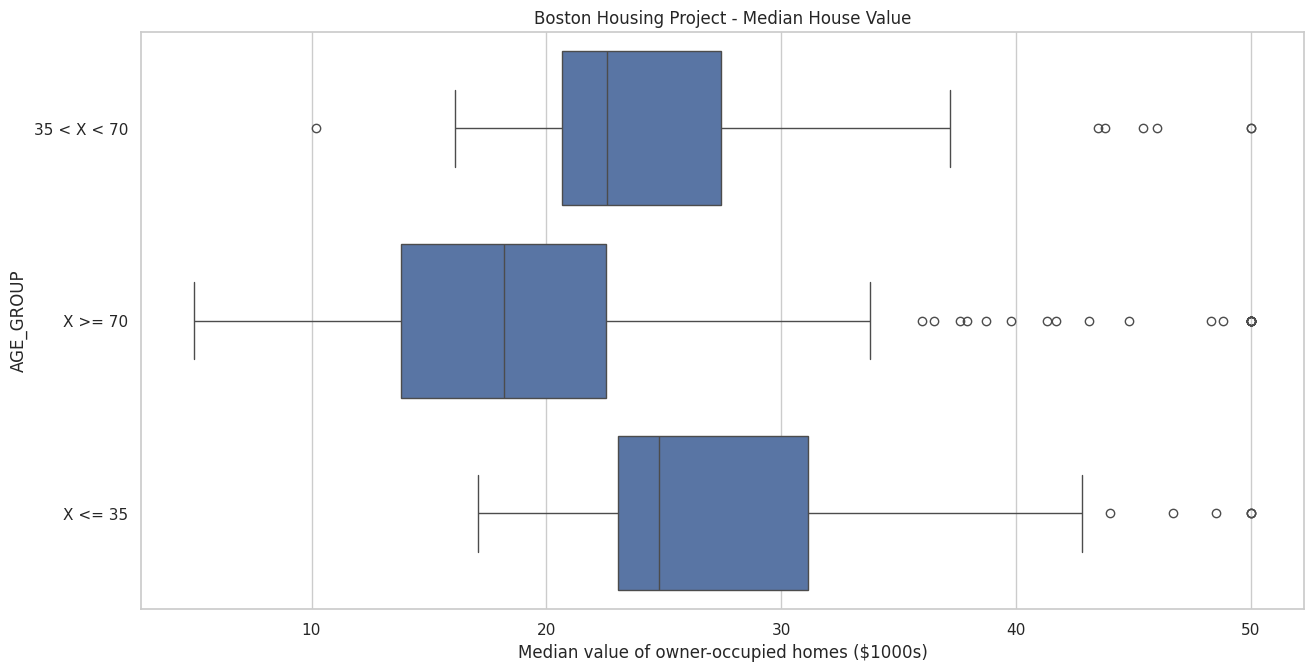

In [31]:
# Create a box plot of the median value
sns.set(style='whitegrid')

#create a figure
plt.figure(figsize=(15, 15))

boston_df['AGE_GROUP'] = boston_df.apply(lambda row : "X <= 35" if row['AGE'] <= 35 else ( "35 < X < 70" if row['V'] < 70 else "X >= 70" ), axis=1 )

boston_df.head()

sns.boxplot(data=boston_df, x='MEDV', y='AGE_GROUP')
plt.title('Boston Housing Project - Median House Value')
plt.xlabel('Median value of owner-occupied homes ($1000s)')

### 5. Scatter plot of Nitric Oxide vs Non-retail business

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Correlation is high


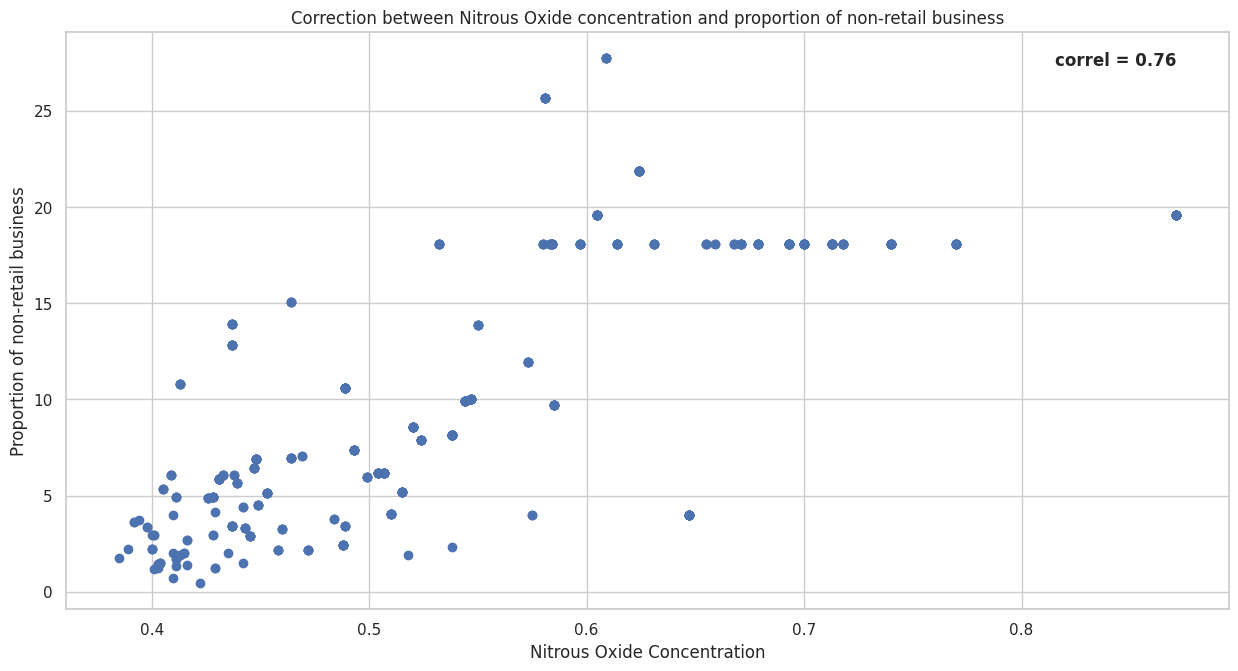

In [67]:

plt.figure(figsize=(15, 7.5))

data = boston_df[[ "NOX", "INDUS" ]].values

x=data[:,0]
y=data[:,1]
mu_x, v_x = np.mean(x), np.var(x)
mu_y, v_y = np.mean(y), np.var(y)

cor = np.corrcoef(x,y)

label = f"correl = {cor[0,1]:.2f}"

plt.scatter(x, y)
plt.title('Correction between Nitrous Oxide concentration and proportion of non-retail business')
plt.xlabel('Nitrous Oxide Concentration')
plt.ylabel('Proportion of non-retail business')
plt.text(1.2, 0.65, label, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, weight="bold")


#### Correlation = 0.76 which represents a high positive correlation between Nitrous Oxide concentration and non-retail business.

### 6. Histogram of pupil to teacher ratio

Min = 12.6 Max = 22.0


Text(0.5, 1.0, 'Histogram of pupil to teacher ratio across towns')

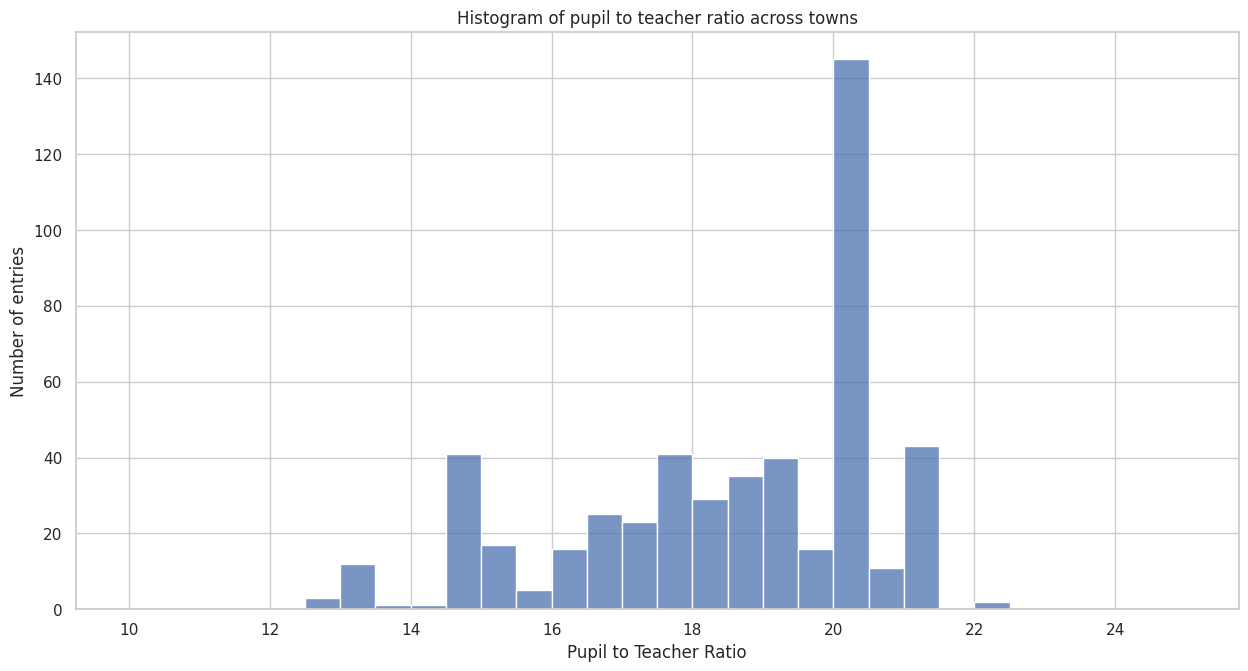

In [78]:
# Histogram of pupil to teach ratio

plt.figure(figsize=(15,7.5))

xlow = boston_df["PTRATIO"].min()
xhigh = boston_df["PTRATIO"].max()

print(f"Min = {xlow} Max = {xhigh}")

boston_df.head()

hist = sns.histplot(x='PTRATIO', data=boston_df,  bins=30, binrange=([10, 25]))
hist.set_xlabel("Pupil to Teacher Ratio")
hist.set_ylabel("Number of entries")
hist.set_title("Histogram of pupil to teacher ratio across towns")

### 7. Hypothesis testing - difference in median houses bounded by Charles River

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) ?

* H0 - null hypothesis, there is **no difference** in Median value of houses bounded by Charles River.
* H1 - alternative hypothesis, **there a difference** between the median value of houses bounded by Charles River
                    

In [89]:
da = boston_df[ boston_df[ "CHAS" ] ==1 ]['MEDV']  # Bounds
db = boston_df[ boston_df[ "CHAS" ] ==0 ]['MEDV']  # Does not bound

t_stat, p_value = scipy.stats.ttest_ind(da, db, equal_var=False)

print("T-test statistic {:.4f}".format(t_stat))
print("p-value {:.2f}%".format(p_value*100))



T-test statistic 3.1133
p-value 0.36%


### Hypothesis test conclusion

Given a p_value of 0.36%, this falls outside of the 5% confidence level for a two-sided hypothesis test, therefore we should **reject** the null hypothesis.

### 8. Difference in Median of houses

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* H0 - null hypothesis, there is **no difference** in Median value of houses for each of the respective proportions of owner occupied units
* H1 - alternate hypothesis, there **is a difference** in Median value of houses for each of the respective proportions of owner occupied units
                    

In [91]:

g1 = boston_df[ boston_df['AGE_GROUP'] == "X <= 35" ]['MEDV'] 
g2 = boston_df[ boston_df['AGE_GROUP'] == "35 < X < 70" ]['MEDV'] 
g3 = boston_df[ boston_df['AGE_GROUP'] == "X >= 70" ]['MEDV'] 
#print(g1, g2, g3)

stat, p_value = scipy.stats.f_oneway(g1, g2, g3)

print(stat, p_value)


36.40764999196599 1.7105011022702984e-15


### Hypthesis test conclusion

Given a p_value of 1.71e-15 shows significant likelihood of the median values being different, we **reject** the null hypothesis.

### 9. Relationship between Nitric oxide concentrations and non-reatail business

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* H0 - null hypothesis, there **is no** significant relationship between Nitric `Oxide concentrations and Propoertion of non-retail business acres
* H1 - alternate hypothesis, there **is a** significant relationship between Nitric `Oxide concentrations and Propoertion of non-retail business acres

In [104]:
cor, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(cor, p_value)

0.7636514469209192 7.913361061210442e-98


### Hypothesis test conclusion

Given the high correlation coefficient (76%) and incredibly small p_value (8e-98), we conclude there is a strong positive relationship between the data.   As such we **reject** the null hypothesis.

### 10. Impact of additional weighted distance

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

* H0 - null hypothesis, there **is no** significant effect of the weighted distance to the employment centres
* H1 - alternate hypothesis, there **is a** significant effect of the weighted distance to the employment centres

In [96]:
x=sm.add_constant(boston_df["DIS"])
y=boston_df['MEDV']
ols=sm.OLS(y, x).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        17:55:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Conclusion
With a p-value of 1.2e-8 and variance (correlation) of 0.061 (25%) this suggests a weak positive correlation, with statistical significance sufficiemt to reject the null hypothesis.